# Detecting Cultural Violence using Natural Language processing.
--

We seek to detect cultural violence in natural language through measuring the self-other gradient. Cultural violence is a theory proposed by Johan Galtung which seeks to explain how aspects of culture  - religion, ideology, language, art along with formal and empirical science - are used to legitimise violence. This notebook is focusses on the representation of religion and ideology in language. Galtung explores how each aspect can be used as a mode of influence to create a ‘self-other gradient’ between ‘Chosen People’ - referred to as an ingroup - and others deemed ‘lower down the scale of worthiness’ - referred to as an outgroup. A general thesis follows whereby the steeper the gradient, the more legitimate violence becomes. To measure the self-other gradient, therefore, means establishing a schema for measuring how aspects of culture are used to elevate the self as an ingroup and debase the other as an outgroup.

## Contributions
The main contributions of this paper are as follows
1. Propose cultural violence as a guiding theory for detecting harmful content in natural language.
2. Propose a novel methodology for detecting harmful content in natural language.
3. Identifying where current general purpose NLP technologies fall short in the specific task of detecting cultural violence
4. A new nlp pipeline workflow for annotating the ingroup andoutgroups in natural language texts.

## Methodology
In having proposed cultural violence as a guiding theory, we proposed the following three step methodology.
1. Detect the ingroup and outgroup of an orator's text
2. Detect how each mode of influence is used for elevating the ingroup and debase the outgroup to create a gradient between each
3. Devise a schema for measuring the gradient

For the detectiong of cultural violence in natural langugage we test existing Natural Language Processing (NLP) technologies for each step of the methodology from which new pipeline components have been devised. NLP is a branch of artificial intelligence which seeks to process natural language to derive meaning. In general terms there are two fields of NLP, theoretical and applied. Theoretical NLP is concerned with the technical aspects of processing language and Applied NLP is concerned with the application of such technologies. The technologies we test are from the spaCy library for Python. This research sits within applied NLP and in seeking to qualify sociological theory sits within the field of the Digital Humanities.

## Dataset
The datasets we are using for these test are speech transcripts of George Bush and Osama bin Laden from the War on Terror in which they advocated violence, therefore, these datasets contain cultural violence. As a reference dataset we use speeches made by Martin Luther King who uses many of the same aspects of culture used by Bush and bin Laden, but he does not advocate for violence. The difference between Luther King's and the other speeches, therefore, may reveal the defining features of culturally violent language.

## Experiments
The tests are as follows:
1. A test of named entity recognition in the spaCy language models against the dataset.
2. A test of sentiment analysis technologies for detecting the ingroup and outgroup of a text.
3. Detailed testing of the Watson API

From these tests, the following spaCy pipeline components have been created:
1. Supplemtary Named Entity Recognition - contains corrections for named entities either not identified or incorrectly identified by the model.
2. A typology of cultural violence based on Mike Martin's 'Why We Fight' and Social Identity Theory for detecting aspects of culture. 
3. Named Concept Recognition - Using the cultural violence typology, and seed words from each speech, a component for detecting concepts related to each aspect of culture.

This notebook now begins with Identifying the ingroup and outgroup of a text.

## The spaCy pipeline

The spacy pipeline, shown in the image above is based on a series of components shown in the table below.

The processing pipeline always depends on the statistical model and its capabilities. For example, a pipeline can only include an entity recognizer component if the model includes data to make predictions of entity labels 

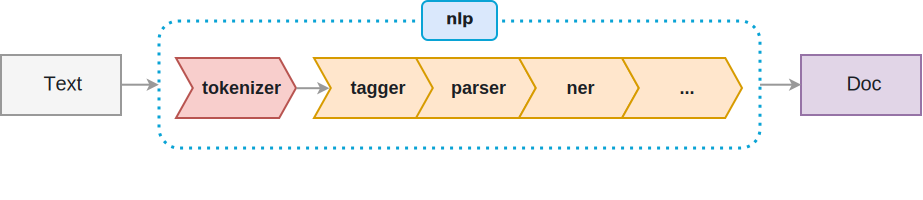

In [1]:
{
    "tags": [
        "hide_input",
    ]
}

from IPython.display import SVG
image_weblink = 'https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg'
display(SVG(url= image_weblink))

## Pipeline Components

A table describing the function of each component is shown here.

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

{
    "tags": [
        "hide_input",
    ]
}

Col1 = "Component"
Col2 = "Creates Objects"
Col3  = "Description"

pipeline = {
    
    "Tokenizer" : {Col1 : "Tokenizer", Col2 : "Doc", Col3 : "Segment text into tokens."},
    "Tagger" : {Col1 : "Tagger", Col2 : "Doc[i].tag", Col3 : "Assign part-of-speech tags."},
    "Parser" : {Col1 : "Dependency Parser", Col2 : "Doc[i].head, Doc[i].dep, Doc.sents, Doc.noun_chunks", Col3 : "Assign dependency labels."},
    "ner" : {Col1 : "Entity Recognizer", Col2 : "Doc.ents, Doc[i].ent_iob, Doc[i].ent_type",Col3 : "Detect and label named entities."},
    "textcat" : {Col1 : "Text Categorizer", Col2 : "Doc.cats", Col3 : "Assign document labels."},
    "..." : {Col1 : "Custom Components", Col2 : "Doc._.xxx, Token._.xxx, Span._.xxx", Col3 : "Assign custom attributes, methods or properties."}
                    }  

display(pd.DataFrame(pipeline).T)

,Component,Creates Objects,Description
Tokenizer,Tokenizer,Doc,Segment text into tokens.
Tagger,Tagger,Doc[i].tag,Assign part-of-speech tags.
Parser,Dependency Parser,"Doc[i].head, Doc[i].dep, Doc.sents, Doc.noun_chunks",Assign dependency labels.
ner,Entity Recognizer,"Doc.ents, Doc[i].ent_iob, Doc[i].ent_type",Detect and label named entities.
textcat,Text Categorizer,Doc.cats,Assign document labels.
...,Custom Components,"Doc._.xxx, Token._.xxx, Span._.xxx","Assign custom attributes, methods or properties."


## Additional Components

Based on the experiments conducted to develop the methodology, we add the following custom build pipeline components

In [8]:
Col1 = "Component"
Col2 = "Creates Objects"
Col3  = "Description"

pipeline = {
    
    "ner" : {Col1 : "Additional Named Entity Recognition", Col2 : "Doc.ents, Doc[i].ent_iob, Doc[i].ent_type", Col3 : "Specific tuning for the dataset"},
    "ncr" : {Col1 : "Named Concept Recognition", Col2 : "Doc._.named_concepts, span._.concept, span._.attribute, span._.feature, span._.classification", Col3 : "Named Concepts from the group schema."}
    
}

display(pd.DataFrame(pipeline).T)

,Component,Creates Objects,Description
ner,Additional Named Entity Recognition,"Doc.ents, Doc[i].ent_iob, Doc[i].ent_type",Specific tuning for the dataset
ncr,Named Concept Recognition,"Doc._.named_concepts, span._.concept, span._.attribute, span._.feature, span._.classification",Named Concepts from the group schema.


# The spaCy language model

The spaCy module is based on langugage models which provide a reference dataset for predicting linguistic annotations. spaCy v2.0 features neural models for tagging, parsing and entity recognition. 

For english there are 8 models listed as follows
1. en_core_web_sm: English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.

2. en_core_web_md: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities

3. en_core_web_lg: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.

4. en_vectors_web_lg

5. en_trf_bertbaseuncased_lg: Provides weights and configuration for the pretrained transformer model bert-base-uncased, published by Google Research. The package uses HuggingFace's transformers implementation of the model. Pretrained transformer models assign detailed contextual word representations, using knowledge drawn from a large corpus of unlabelled text. You can use the contextual word representations as features in a variety of pipeline components that can be trained on your own data.

6. en_trf_robertabase_lg: Provides weights and configuration for the pretrained transformer model roberta-base, published by Facebook. The package uses HuggingFace's transformers implementation of the model. Pretrained transformer models assign detailed contextual word representations, using knowledge drawn from a large corpus of unlabelled text. You can use the contextual word representations as features in a variety of pipeline components that can be trained on your own data.

7. en_trf_distilbertbaseuncased_lg: Provides weights and configuration for the pretrained transformer model distilbert-base-uncased, published by Hugging Face. The package uses HuggingFace's transformers implementation of the model. Pretrained transformer models assign detailed contextual word representations, using knowledge drawn from a large corpus of unlabelled text. You can use the contextual word representations as features in a variety of pipeline components that can be trained on your own data.

8. en_trf_xlnetbasecased_lg: Provides weights and configuration for the pretrained transformer model xlnet-base-cased, published by CMU and Google Brain. The package uses HuggingFace's transformers implementation of the model. Pretrained transformer models assign detailed contextual word representations, using knowledge drawn from a large corpus of unlabelled text. You can use the contextual word representations as features in a variety of pipeline components that can be trained on your own data.

The accuracy of an nlp tasks very much depends on the model. 

This test uses en_core_web_md.